In [86]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#http://dados.prefeitura.sp.gov.br/pt_PT/dataset/folha-de-pagamento-spturis
# SPTURIS - Folha de Pagamento - 2018.xlsx
df = pd.read_excel('folhaspturis2018.xlsx')

In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,5417,5418,5419,5420,5421,5422,5423,5424,5425,5426
EMPRESA,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,...,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS
MÊS,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,...,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro
ANO,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
NOME,JOSE DE JESUS SODRE,ALIRIO ALBINO RIBEIRO,JOSE DEVANIR LINO,MANOEL NILSON OLIVEIRA GAMA,JOSE LINO XAVIER DA SILVA,LUZDALMA PARREIRA DE SOUZA,JOSE BARBOSA COSTA,JOSE LOURENCO DA SILVA,EDSON ANTONIO SAURA,MARIA NEVES RESENDE,...,RAFAEL BRUNO FAVACHO,THIAGO SQUASSONI MARTINS,THIFANNY MIGUEL R DA COSTA,ELEONORA PIAGGI PORTELA,JACINTA DE FATIMA P LOURENCO,AMANDA GONCALVES P CANDIDO,EDSON ANTONIO GILLI E SILVA,FERNANDA DO PRADO GAVA,LUCIMARA RIBEIRO DOS S BARROS,MARIA CAROLINA LOPES PESSOA
CARGO,SUPERV. CARPINTARIA,ANALISTA ADM - RH,SUPERV. OPERACAO,SUPERV. ARRECADACAO,AG MANUT HIDRAULICA,ESPEC ENG ARQUIT-ARQ,PRODUTOR TEC EVENTOS,AG MANUT CIVIL,GERENTE (F. CONF.),AUXILIAR DE LIMPEZA,...,ESTAGIARIO,ESTAGIARIO,ESTAGIARIO,CEDIDO OUTRO ORGAO,CEDIDO OUTRO ORGAO,ASSESSOR IV,OPERADOR DE CAIXA,ESTAGIARIO,ESTAGIARIO,ESTAGIARIO
LOTAÇÃO,COORD MANUTENCAO CIVIL,COORD ADMINISTRACAO PESSOAL,COORD OPERACAO DE ESTACIONAMENTO,COORD ARRECADACAO DE ESTACIONAMENTO,COORD MANUTENCAO CIVIL,GER PLANEJAMENTO E PROJETOS,COORD SUPORTE E EVENTOS,COORD MANUTENCAO CIVIL,GER DE REDUCAO DESP CONTRATUAIS E ALMOX,COORD SERVICOS AUXILIARES,...,COORD DE TURISMO,GER COMPRAS E CONTRATOS,COORD DE TURISMO,GER PLANEJAMENTO E PROJETOS,GER PLANEJAMENTO E PROJETOS,GER COMUNICACAO E PESQUISA,COORD ARRECADACAO DE ESTACIONAMENTO,COORD DE TURISMO,GER PRODUCAO E EVENTOS,COORD JURIDICA CONTENCIOSA
ADMISSÃO,1978-02-22 00:00:00,1984-04-11 00:00:00,1986-04-01 00:00:00,1986-04-01 00:00:00,1986-05-14 00:00:00,1986-05-27 00:00:00,1986-06-02 00:00:00,1987-04-01 00:00:00,1987-04-01 00:00:00,1987-04-01 00:00:00,...,2018-07-02 00:00:00,2018-07-02 00:00:00,2018-10-08 00:00:00,2013-05-10 00:00:00,2009-07-27 00:00:00,2018-11-01 00:00:00,2018-06-07 00:00:00,2018-12-18 00:00:00,2018-02-02 00:00:00,2017-10-02 00:00:00
NASCIMENTO,1952,1967,1953,1957,1962,1959,1957,1951,1961,1934,...,1998,1998,1999,1966,1956,1994,1965,1996,1997,1991
VENCIMENTOS,15264.2,13565.4,6126.61,10025.7,5123.6,19903.7,9047.87,4400.81,21434.9,0,...,1176.48,1043.76,1176.48,28386.2,48118.8,6395.75,782.76,387,1920.04,1919.52
ENCARGOS,5639.77,5012.06,0,3704.26,1893.04,7353.93,3342.96,1625.99,7919.67,0,...,0,0,0,0,0,1783.58,155.7,0,0,0


In [13]:
del df['ARQUIVO ID']

In [19]:
df.shape

(5427, 15)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5427 entries, 0 to 5426
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   EMPRESA              5427 non-null   object        
 1   MÊS                  5427 non-null   object        
 2   ANO                  5427 non-null   int64         
 3   NOME                 5427 non-null   object        
 4   CARGO                5427 non-null   object        
 5   LOTAÇÃO              5427 non-null   object        
 6   ADMISSÃO             5427 non-null   datetime64[ns]
 7   NASCIMENTO           5427 non-null   int64         
 8   VENCIMENTOS          5427 non-null   float64       
 9   ENCARGOS             5427 non-null   float64       
 10  BENEFÍCIOS           5427 non-null   float64       
 11  OUTRAS REMUNERAÇÕES  5427 non-null   int64         
 12  VÍNCULO              5427 non-null   object        
 13  DETALHE VÍNCULO      5427 non-nul

In [21]:
df.describe()

,ANO,NASCIMENTO,VENCIMENTOS,ENCARGOS,BENEFÍCIOS,OUTRAS REMUNERAÇÕES
count,5427.0,5427.000000,5427.000000,5427.000000,5427.000000,5427.0
mean,2018.0,1972.195135,6729.110024,2321.065084,2063.017942,0.0
std,0.0,12.581268,7159.716651,4255.845930,931.250425,0.0
min,2018.0,1934.000000,0.000000,0.000000,0.000000,0.0
25%,2018.0,1963.000000,2946.210000,962.315000,1554.850000,0.0
50%,2018.0,1971.000000,4924.950000,1633.890000,2051.980000,0.0
75%,2018.0,1981.000000,8626.840000,3037.440000,2643.290000,0.0
max,2018.0,2015.000000,267176.050000,250890.570000,6799.050000,0.0


<h1> Soma de Vencimentos por Mês</h1>
<p> Soma dos vencimentos da prefeitura de Santos </p>

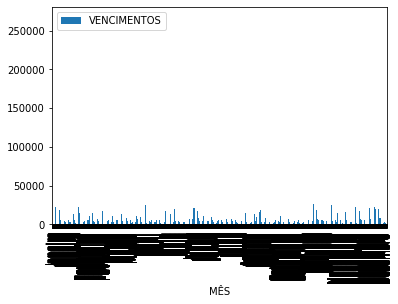

In [22]:
df.plot.bar(x='MÊS', y='VENCIMENTOS')

1. Criamos um groupby para somar a coluna VENCIMENTOS e agrupar por mes. <br>
2. Define que o retorno sera um DataFrame. <br>
3. Criou um novo dataframe dfSumMes <br> 

In [ ]:
dfSumMes = pd.DataFrame( df.groupby('MÊS').VENCIMENTOS.sum().reset_index() )

1. Cria uma coluna chama mes_num
2. Utiliza uma biblioteca chama numpy, usamos uma funcao where (NADA MAIS QUE UM IF)
3. Lista todos os meses e atribui um valor a eles

In [34]:
dfSumMes['mes_num'] = np.where(dfSumMes['MÊS'] == 'Janeiro', 1,
                             np.where(dfSumMes['MÊS'] == 'Fevereiro', 2,
                             np.where(dfSumMes['MÊS'] == 'Março', 3,
                             np.where(dfSumMes['MÊS'] == 'Abril', 4,
                             np.where(dfSumMes['MÊS'] == 'Maio', 5,
                             np.where(dfSumMes['MÊS'] == 'Junho', 6,
                            np.where(dfSumMes['MÊS'] == 'Julho', 7,
                            np.where(dfSumMes['MÊS'] == 'Agosto', 8,
                            np.where(dfSumMes['MÊS'] == 'Setembro', 9,
                            np.where(dfSumMes['MÊS'] == 'Outubro', 10,
                            np.where(dfSumMes['MÊS'] == 'Novembro', 11,
                            np.where(dfSumMes['MÊS'] == 'Dezembro', 12,0))))))))))))

Estamos ordenando o df pela coluna mes_num, o inplace serve para salvar.

In [43]:
dfSumMes.sort_values(by=['mes_num'], inplace=True)

plotamos um grafico de barras

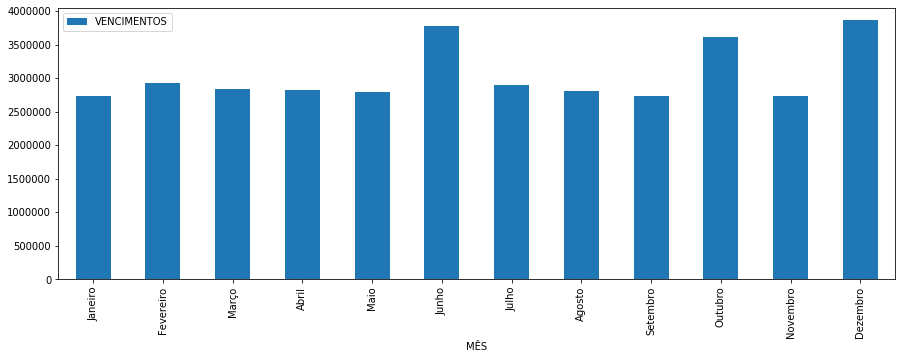

In [44]:
dfSumMes.plot.bar(x='MÊS', y='VENCIMENTOS', figsize=(15,5))

<h1> Salario Liquido por tempo de casa </h1>

In [67]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,5417,5418,5419,5420,5421,5422,5423,5424,5425,5426
EMPRESA,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,...,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS,SPTURIS
MÊS,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,Janeiro,...,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro,Dezembro
ANO,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
NOME,JOSE DE JESUS SODRE,ALIRIO ALBINO RIBEIRO,JOSE DEVANIR LINO,MANOEL NILSON OLIVEIRA GAMA,JOSE LINO XAVIER DA SILVA,LUZDALMA PARREIRA DE SOUZA,JOSE BARBOSA COSTA,JOSE LOURENCO DA SILVA,EDSON ANTONIO SAURA,MARIA NEVES RESENDE,...,RAFAEL BRUNO FAVACHO,THIAGO SQUASSONI MARTINS,THIFANNY MIGUEL R DA COSTA,ELEONORA PIAGGI PORTELA,JACINTA DE FATIMA P LOURENCO,AMANDA GONCALVES P CANDIDO,EDSON ANTONIO GILLI E SILVA,FERNANDA DO PRADO GAVA,LUCIMARA RIBEIRO DOS S BARROS,MARIA CAROLINA LOPES PESSOA
CARGO,SUPERV. CARPINTARIA,ANALISTA ADM - RH,SUPERV. OPERACAO,SUPERV. ARRECADACAO,AG MANUT HIDRAULICA,ESPEC ENG ARQUIT-ARQ,PRODUTOR TEC EVENTOS,AG MANUT CIVIL,GERENTE (F. CONF.),AUXILIAR DE LIMPEZA,...,ESTAGIARIO,ESTAGIARIO,ESTAGIARIO,CEDIDO OUTRO ORGAO,CEDIDO OUTRO ORGAO,ASSESSOR IV,OPERADOR DE CAIXA,ESTAGIARIO,ESTAGIARIO,ESTAGIARIO
LOTAÇÃO,COORD MANUTENCAO CIVIL,COORD ADMINISTRACAO PESSOAL,COORD OPERACAO DE ESTACIONAMENTO,COORD ARRECADACAO DE ESTACIONAMENTO,COORD MANUTENCAO CIVIL,GER PLANEJAMENTO E PROJETOS,COORD SUPORTE E EVENTOS,COORD MANUTENCAO CIVIL,GER DE REDUCAO DESP CONTRATUAIS E ALMOX,COORD SERVICOS AUXILIARES,...,COORD DE TURISMO,GER COMPRAS E CONTRATOS,COORD DE TURISMO,GER PLANEJAMENTO E PROJETOS,GER PLANEJAMENTO E PROJETOS,GER COMUNICACAO E PESQUISA,COORD ARRECADACAO DE ESTACIONAMENTO,COORD DE TURISMO,GER PRODUCAO E EVENTOS,COORD JURIDICA CONTENCIOSA
ADMISSÃO,1978-02-22 00:00:00,1984-04-11 00:00:00,1986-04-01 00:00:00,1986-04-01 00:00:00,1986-05-14 00:00:00,1986-05-27 00:00:00,1986-06-02 00:00:00,1987-04-01 00:00:00,1987-04-01 00:00:00,1987-04-01 00:00:00,...,2018-07-02 00:00:00,2018-07-02 00:00:00,2018-10-08 00:00:00,2013-05-10 00:00:00,2009-07-27 00:00:00,2018-11-01 00:00:00,2018-06-07 00:00:00,2018-12-18 00:00:00,2018-02-02 00:00:00,2017-10-02 00:00:00
NASCIMENTO,1952,1967,1953,1957,1962,1959,1957,1951,1961,1934,...,1998,1998,1999,1966,1956,1994,1965,1996,1997,1991
VENCIMENTOS,15264.2,13565.4,6126.61,10025.7,5123.6,19903.7,9047.87,4400.81,21434.9,0,...,1176.48,1043.76,1176.48,28386.2,48118.8,6395.75,782.76,387,1920.04,1919.52
ENCARGOS,5639.77,5012.06,0,3704.26,1893.04,7353.93,3342.96,1625.99,7919.67,0,...,0,0,0,0,0,1783.58,155.7,0,0,0


In [46]:
df['vl_liquido'] = (df['VENCIMENTOS'] + df['BENEFÍCIOS'] + df['OUTRAS REMUNERAÇÕES']
                   ) - df['ENCARGOS']

In [51]:
dt_do_dia = pd.to_datetime('today').
print(dt_do_dia)

2020-03-07 16:12:05.962941


In [66]:
df['anos_trabalhados'] = (round(((dt_do_dia - df['ADMISSÃO']).dt.days) / 365,0)).astype('int64')

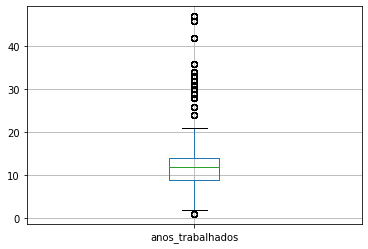

In [70]:
boxplot = df.boxplot(column=['anos_trabalhados'])

In [ ]:
dfFuncUniq = pd.DataFrame(df.groupby('anos_trabalhados').NOME.nunique().reset_index())
dfFuncUniq.rename(columns={"NOME": "qtd_func"}, inplace=True)

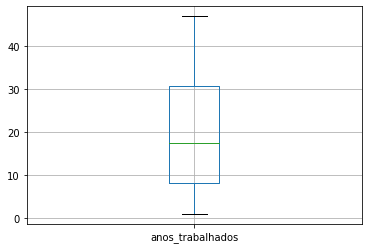

In [81]:
boxplot = dfFuncUniq.boxplot(column=['anos_trabalhados'])

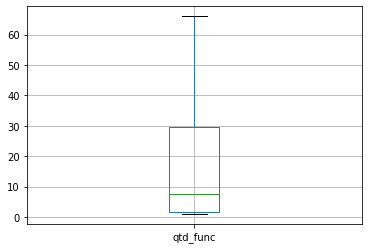

In [82]:
boxplot = dfFuncUniq.boxplot(column=['qtd_func'])

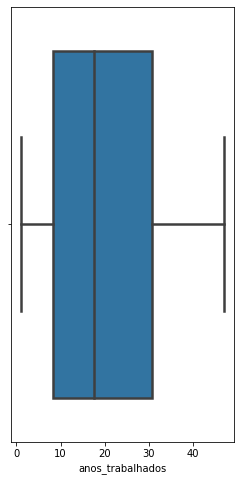

In [90]:
plt.figure(figsize=(4,8))
sns.boxplot(x='anos_trabalhados', data=dfFuncUniq, linewidth=2.5)
plt.show()

In [91]:
df.sort_values(by=['vl_liquido'], ascending = False,inplace=True)
df.head(5)

,EMPRESA,MÊS,ANO,NOME,CARGO,LOTAÇÃO,ADMISSÃO,NASCIMENTO,VENCIMENTOS,ENCARGOS,BENEFÍCIOS,OUTRAS REMUNERAÇÕES,VÍNCULO,DETALHE VÍNCULO,LIMINAR,vl_liquido,anos_trabalhados
4520,SPTURIS,Outubro,2018,ESTEVAO ANTONIO VUKELIC,ANAL NEGOCIOS VENDAS,COORD DE MARKETING,2010-09-20,1959,132297.75,31276.45,3241.64,0,Desligado,Concursado NÃO ocupante de cargo em comissão,-,104262.94,9
5421,SPTURIS,Dezembro,2018,JACINTA DE FATIMA P LOURENCO,CEDIDO OUTRO ORGAO,GER PLANEJAMENTO E PROJETOS,2009-07-27,1956,48118.78,0.00,1690.39,0,Servidor público cedido por outro ente: Servid...,Não concursado NÃO ocupante de cargo em comissão,-,49809.17,11
4515,SPTURIS,Outubro,2018,JACINTA DE FATIMA P LOURENCO,CEDIDO OUTRO ORGAO,GER PLANEJAMENTO E PROJETOS,2009-07-27,1956,47874.51,0.00,1660.07,0,Servidor público cedido por outro ente: Servid...,Não concursado NÃO ocupante de cargo em comissão,-,49534.58,11
4068,SPTURIS,Setembro,2018,JOAO EDUARDO DE V AMARAL AYRES,CHEFE DE GABINETE,CHEFIA DE GABINETE,2017-04-13,1973,56043.94,9486.32,1077.11,0,Desligado,Não concursado ocupante de cargo em comissão,-,47634.73,3
439,SPTURIS,Janeiro,2018,ELEONORA PIAGGI PORTELA,CEDIDO OUTRO ORGAO,GER PLANEJAMENTO E PROJETOS,2013-05-10,1966,40171.19,0.00,2515.76,0,Servidor público cedido por outro ente: Servid...,Não concursado NÃO ocupante de cargo em comissão,-,42686.95,7


In [92]:
df['VÍNCULO'].unique()

array(['Desligado',
       'Servidor público cedido por outro ente: Servidor Público Municipal',
       'CLT: contrato por tempo indeterminado',
       'Estatutário: diretor (estatuto social)',
       'Estatutário: conselho administrativo (estatuto social)',
       'Estatutário: comitê de auditoria estatutária', 'Estagiário',
       'CLT: aprendiz', 'Estatutário: conselho fiscal (estatuto social)',
       'CLT: contrato por tempo determinado'], dtype=object)

In [94]:
selecao = (df['MÊS'] == 'Outubro')
dfOut = pd.DataFrame(df[selecao])
dfOut.head(2)

,EMPRESA,MÊS,ANO,NOME,CARGO,LOTAÇÃO,ADMISSÃO,NASCIMENTO,VENCIMENTOS,ENCARGOS,BENEFÍCIOS,OUTRAS REMUNERAÇÕES,VÍNCULO,DETALHE VÍNCULO,LIMINAR,vl_liquido,anos_trabalhados
4520,SPTURIS,Outubro,2018,ESTEVAO ANTONIO VUKELIC,ANAL NEGOCIOS VENDAS,COORD DE MARKETING,2010-09-20,1959,132297.75,31276.45,3241.64,0,Desligado,Concursado NÃO ocupante de cargo em comissão,-,104262.94,9
4515,SPTURIS,Outubro,2018,JACINTA DE FATIMA P LOURENCO,CEDIDO OUTRO ORGAO,GER PLANEJAMENTO E PROJETOS,2009-07-27,1956,47874.51,0.00,1660.07,0,Servidor público cedido por outro ente: Servid...,Não concursado NÃO ocupante de cargo em comissão,-,49534.58,11


In [95]:
df.groupby('VÍNCULO').vl_liquido.sum().reset_index()

,VÍNCULO,vl_liquido
0,CLT: aprendiz,339541.28
1,CLT: contrato por tempo determinado,98083.27
2,CLT: contrato por tempo indeterminado,31326859.57
3,Desligado,653957.33
4,Estagiário,436111.11
5,Estatutário: comitê de auditoria estatutária,43200.00
6,Estatutário: conselho administrativo (estatuto...,369600.00
7,Estatutário: conselho fiscal (estatuto social),117600.00
8,Estatutário: diretor (estatuto social),1317659.95
9,Servidor público cedido por outro ente: Servid...,415845.75
